In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('./train_format1.csv')

In [3]:
train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [4]:
train.isna().sum()

user_id        0
merchant_id    0
label          0
dtype: int64

In [5]:
train.duplicated().sum() #重复数据行数

0

In [6]:
train.shape

(260864, 3)

In [7]:
test = pd.read_csv('./test_format1.csv', usecols=['user_id','merchant_id']) #usecols读出指定的列

In [8]:
test.head()

,user_id,merchant_id
0,163968,4605
1,360576,1581
2,98688,1964
3,98688,3645
4,295296,3361


In [9]:
test.isna().sum()

user_id        0
merchant_id    0
dtype: int64

In [10]:
test.duplicated().sum()

0

In [11]:
test.shape

(261477, 2)

In [12]:
user_info = pd.read_csv('./user_info_format1.csv')

In [13]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [14]:
user_info.isna().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

In [15]:
user_info['age_range'].fillna(0, inplace=True) #去空
user_info['gender'].fillna(2, inplace=True)

In [16]:
user_info.isna().sum()

user_id      0
age_range    0
gender       0
dtype: int64

In [17]:
user_info.duplicated().sum()

0

In [18]:
user_info.shape

(424170, 3)

In [19]:
def get_data(file_name, chunk_size=500000):
    reader = pd.read_csv(file_name, iterator=True, header=0) #iterator=True，返回迭代器对象
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size) #每次读取500000行数据,不够一个chunk_size则将剩余的全部读取直至为空。return dataframe
            chunks.append(chunk)
        except:
            loop = False
            print('数据获取完毕！')
    df = pd.concat(chunks, ignore_index=True)
    return df
user_log = get_data(file_name='./user_log_format1.csv', chunk_size=500000)#数据量太大，直接读取可能会导致内存溢出

数据获取完毕！


In [20]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [21]:
user_log.isna().sum()

user_id           0
item_id           0
cat_id            0
seller_id         0
brand_id       1327
time_stamp        0
action_type       0
dtype: int64

In [22]:
user_log['brand_id'].fillna(0, inplace=True) #去空

In [23]:
user_log.isna().sum()

user_id        0
item_id        0
cat_id         0
seller_id      0
brand_id       0
time_stamp     0
action_type    0
dtype: int64

In [24]:
user_log.duplicated().sum()

270916

In [25]:
user_log.drop_duplicates(inplace=True) #去重

In [26]:
user_log.duplicated().sum()

0

In [27]:
user_log.shape

(777659, 7)

In [28]:
user_log.rename(columns={'seller_id':'merchant_id'}, inplace=True)

In [29]:
user_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## -------------------------------------------------------------------------------------------------------------

## 重复购买和非重复购买饼图

In [30]:
label = train['label'].value_counts()  #统计train中label列的不同取值的数量

In [31]:
label

0    244912
1     15952
Name: label, dtype: int64

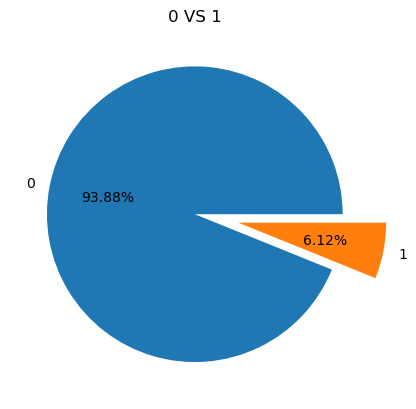

In [32]:
plt.pie(label, labels=label.index, autopct='%.2f%%', explode=[0, 0.3])
plt.title('0 VS 1')
plt.show()

## 年龄/性别 和复购的关系

In [33]:
t_userinfo = train.merge(user_info, on='user_id', how='inner')

In [34]:
t_userinfo.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,0.0,0.0


In [35]:
t_userinfo.shape

(260864, 5)

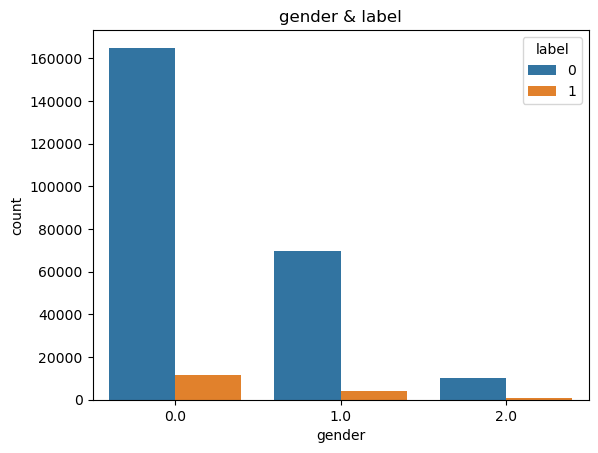

In [36]:
sns.countplot(x='gender', hue='label', data=t_userinfo)#条形图，x和y轴均可
plt.title('gender & label')
plt.show()

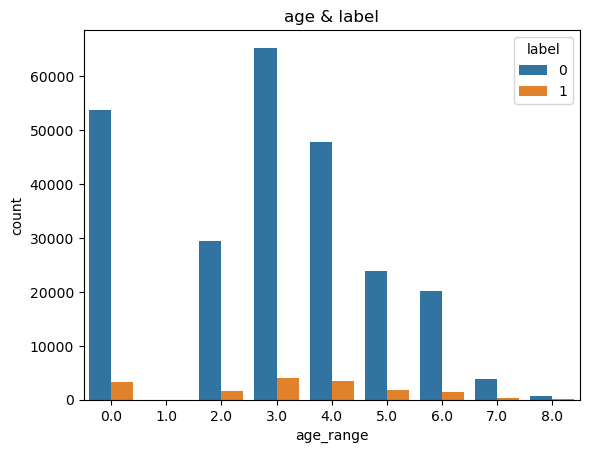

In [37]:
sns.countplot(x='age_range', hue='label', data=t_userinfo)
plt.title('age & label')
plt.show()

## ------------------------------------------------------------------------------------------------------------

In [38]:
pd.set_option('display.max_columns',None)

In [39]:
matrix = pd.concat([train, test], axis=0)

In [40]:
matrix.tail()

,user_id,merchant_id,label
261472,228479,3111,NaN
261473,97919,2341,NaN
261474,97919,3971,NaN
261475,32639,3536,NaN
261476,32639,3319,NaN


In [41]:
user_log = pd.merge(user_log, matrix[['user_id','merchant_id']],on=['user_id','merchant_id'], how='inner') 

In [42]:
user_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,406349,1280,2700,5476.0,1111,0
1,328862,406349,1280,2700,5476.0,1111,2
2,234512,240182,81,3018,4144.0,1111,2
3,234512,240182,81,3018,4580.0,1111,0
4,234512,137298,1432,3271,6957.0,1111,2


In [43]:
user_log['brand_id'] = user_log['brand_id'].astype('int32')
user_log['time_stamp'] = pd.to_datetime(user_log['time_stamp'], format='%m%d')

In [44]:
user_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,406349,1280,2700,5476,1900-11-11,0
1,328862,406349,1280,2700,5476,1900-11-11,2
2,234512,240182,81,3018,4144,1900-11-11,2
3,234512,240182,81,3018,4580,1900-11-11,0
4,234512,137298,1432,3271,6957,1900-11-11,2


In [45]:
matrix = pd.merge(matrix, user_info, on='user_id', how='left')

In [46]:
matrix.tail()

,user_id,merchant_id,label,age_range,gender
522336,228479,3111,NaN,6.0,0.0
522337,97919,2341,NaN,8.0,1.0
522338,97919,3971,NaN,8.0,1.0
522339,32639,3536,NaN,0.0,0.0
522340,32639,3319,NaN,0.0,0.0


In [47]:
matrix.isna().sum()

user_id             0
merchant_id         0
label          261477
age_range           0
gender              0
dtype: int64

In [48]:
matrix['label'] = matrix['label'].astype(str)
matrix['age_range'] = matrix['age_range'].astype('int8') 
matrix['gender'] = matrix['gender'].astype('int8')

In [49]:
matrix.tail()

,user_id,merchant_id,label,age_range,gender
522336,228479,3111,nan,6,0
522337,97919,2341,nan,8,1
522338,97919,3971,nan,8,1
522339,32639,3536,nan,0,0
522340,32639,3319,nan,0,0


## 1.1 用户在平台的总交互次数

In [50]:
groups = user_log.groupby(by='user_id')

In [51]:
#list(groups)

In [52]:
temp = groups.size().reset_index()

In [53]:
temp.head()

,user_id,0
0,16,7
1,19,49
2,244,9
3,259,5
4,281,2


In [54]:
temp.rename(columns={0:'user_num'}, inplace=True)

In [55]:
temp.head()

,user_id,user_num
0,16,7
1,19,49
2,244,9
3,259,5
4,281,2


In [56]:
matrix = pd.merge(matrix, temp, on='user_id', how='left')

In [57]:
matrix[matrix['user_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num
68,374400,302,0.0,5,1,19.0
123,189312,1760,0.0,4,0,44.0
124,189312,2511,0.0,4,0,44.0
188,71808,4850,0.0,5,1,6.0
243,342912,514,0.0,4,0,4.0


## 1.2 用户最近一次购买距离第一次的时长

In [58]:
#list(groups)

In [59]:
temp=groups['time_stamp'].agg([('F_time','min'),('L_time','max')])

In [60]:
temp.head()

,F_time,L_time
user_id,,
16,1900-11-11,1900-11-11
19,1900-11-05,1900-11-11
244,1900-11-11,1900-11-11
259,1900-11-10,1900-11-11
281,1900-11-11,1900-11-11


In [61]:
temp.reset_index(inplace=True)

In [62]:
temp.head()

,user_id,F_time,L_time
0,16,1900-11-11,1900-11-11
1,19,1900-11-05,1900-11-11
2,244,1900-11-11,1900-11-11
3,259,1900-11-10,1900-11-11
4,281,1900-11-11,1900-11-11


In [63]:
temp['user_days'] = (temp['L_time']-temp['F_time']).dt.days

In [64]:
temp.head()

,user_id,F_time,L_time,user_days
0,16,1900-11-11,1900-11-11,0
1,19,1900-11-05,1900-11-11,6
2,244,1900-11-11,1900-11-11,0
3,259,1900-11-10,1900-11-11,1
4,281,1900-11-11,1900-11-11,0


In [65]:
matrix = pd.merge(matrix, temp[['user_id','user_days']], on='user_id', how='left')

In [66]:
matrix[matrix['user_days'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days
68,374400,302,0.0,5,1,19.0,0.0
123,189312,1760,0.0,4,0,44.0,1.0
124,189312,2511,0.0,4,0,44.0,1.0
188,71808,4850,0.0,5,1,6.0,0.0
243,342912,514,0.0,4,0,4.0,0.0


## 1.3 用户对不同【商品、品类、品牌、商家】的交互次数

In [67]:
merfeature = ['user_id', 'item_id', 'cat_id',  'brand_id', 'merchant_id']
temp=user_log[merfeature].groupby(by='user_id')

In [68]:
#list(temp)

In [69]:
xsum = lambda x: len(x.unique())   #.unique()方法返回的是去重之后的不同值
#xsum = lambda x: x.nunique()       #.nunique()方法则直接放回不同值的个数
inmerchant = temp.agg(xsum)

In [70]:
inmerchant.head()

,item_id,cat_id,brand_id,merchant_id
user_id,,,,
16,6,1,1,1
19,42,27,8,4
244,6,5,2,2
259,2,2,2,2
281,1,1,1,1


In [71]:
inmerchant.reset_index(inplace=True)
inmerchant.columns = ['user_id','item_num','cat_num','brand_num','merchant_num']

In [72]:
inmerchant.head()

,user_id,item_num,cat_num,brand_num,merchant_num
0,16,6,1,1,1
1,19,42,27,8,4
2,244,6,5,2,2
3,259,2,2,2,2
4,281,1,1,1,1


In [73]:
matrix = pd.merge(matrix, inmerchant, on='user_id', how='left')

In [74]:
matrix[matrix['item_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0


## 1.4 用户进行【点击、加购物车、购买、收藏】的次数

In [75]:
temp = pd.pivot_table(user_log[['user_id','action_type']],index='user_id', columns='action_type',aggfunc=np.count_nonzero, fill_value=0)

In [76]:
temp.reset_index(inplace=True)

In [77]:
temp.columns = ['user_id','uclick_num','uadd_num','ubuy_num','usave_num']

In [78]:
temp.tail()

,user_id,uclick_num,uadd_num,ubuy_num,usave_num
6871,423921,5,0,2,0
6872,423986,8,0,2,0
6873,424070,1,0,2,2
6874,424083,9,0,2,0
6875,424164,14,0,2,2


In [79]:
matrix = pd.merge(matrix, temp, on='user_id', how='left')

In [80]:
matrix[matrix['uclick_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0


## 1.5 用户的购买率=购买次数/点击次数

In [81]:
matrix['user_buy_rate'] = matrix['ubuy_num']/(matrix['uclick_num']+1)

In [82]:
matrix[matrix['uclick_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333


## 2.1 商家被交互的数量

In [83]:
groups = user_log.groupby(by='merchant_id')

In [84]:
#list(groups)

In [85]:
temp = groups.size().reset_index()

In [86]:
temp.head()

,merchant_id,0
0,2,12
1,8,11
2,9,10
3,10,135
4,13,17


In [87]:
temp.rename(columns={0:'merchant_benum'}, inplace=True)

In [88]:
temp.head()

,merchant_id,merchant_benum
0,2,12
1,8,11
2,9,10
3,10,135
4,13,17


In [89]:
matrix = pd.merge(matrix, temp, on='merchant_id', how='left')

In [90]:
matrix[matrix['merchant_benum'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum
0,34176,3906,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
1,34176,121,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
3,34176,2217,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0
4,230784,4818,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0
5,362112,2618,0.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


## 2.2 商家被交互的【商品、品类、品牌】的数量

In [91]:
temp = groups[['user_id', 'item_id','cat_id','brand_id']].agg(xsum)  

In [92]:
temp.head()

,user_id,item_id,cat_id,brand_id
merchant_id,,,,
2,4,6,3,1
8,2,9,3,1
9,2,5,3,5
10,20,69,7,2
13,3,7,2,1


In [93]:
temp.reset_index(inplace=True)
temp.columns = ['merchant_id','merchant_user','merchant_item','merchant_cat','merchant_brand']

In [94]:
temp.head()

,merchant_id,merchant_user,merchant_item,merchant_cat,merchant_brand
0,2,4,6,3,1
1,8,2,9,3,1
2,9,2,5,3,5
3,10,20,69,7,2
4,13,3,7,2,1


In [95]:
matrix = pd.merge(matrix, temp, on='merchant_id', how='left')

In [96]:
matrix[matrix['merchant_id'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand
0,34176,3906,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0
1,34176,121,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0
2,34176,4356,1.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34176,2217,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0
4,230784,4818,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0


## 2.3 商家【被点击、被加购物车、被购买、被收藏】的次数

In [97]:
temp = pd.pivot_table(user_log[['merchant_id','action_type']],index='merchant_id',columns='action_type',aggfunc=np.count_nonzero, fill_value=0)
temp.reset_index(inplace=True)
temp.columns = ['merchant_id','mclick_num','mbuy_num','madd_num','msave_num']

In [98]:
temp.head()

,merchant_id,mclick_num,mbuy_num,madd_num,msave_num
0,2,8,0,8,0
1,8,9,0,4,0
2,9,5,0,4,6
3,10,103,0,48,16
4,13,13,0,6,2


In [99]:
matrix = pd.merge(matrix, temp, on='merchant_id', how='left')

In [100]:
matrix[matrix['mclick_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num
0,34176,3906,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0,73.0,0.0,14.0,18.0
1,34176,121,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0,402.0,4.0,158.0,34.0
3,34176,2217,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0,55.0,0.0,50.0,12.0
4,230784,4818,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0,158.0,2.0,56.0,12.0
5,362112,2618,0.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,10.0,5.0,3.0,8.0,0.0,14.0,0.0


## 2.4 商家的复购次数

In [101]:
temp = pd.DataFrame(train.loc[train['label']==1, 'merchant_id'].value_counts())
temp.reset_index(inplace=True)

In [102]:
temp.columns = ['merchant_id','merchant_rebuy']
temp.head()

,merchant_id,merchant_rebuy
0,3828,410
1,1393,227
2,4044,209
3,1102,207
4,1346,192


In [103]:
matrix = pd.merge(matrix, temp, on='merchant_id', how='left')

In [104]:
matrix[matrix['merchant_id'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy
0,34176,3906,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0,73.0,0.0,14.0,18.0,5.0
1,34176,121,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0,402.0,4.0,158.0,34.0,64.0
2,34176,4356,1.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,34176,2217,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0,55.0,0.0,50.0,12.0,72.0
4,230784,4818,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0,158.0,2.0,56.0,12.0,80.0


## 2.5 商家的被购买率

In [105]:
matrix['merchant_buy_rate'] = matrix['mbuy_num']/(matrix['mclick_num']+1)

In [106]:
matrix[matrix['mbuy_num'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate
0,34176,3906,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0,73.0,0.0,14.0,18.0,5.0,0.000000
1,34176,121,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0,402.0,4.0,158.0,34.0,64.0,0.009926
3,34176,2217,0.0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0,55.0,0.0,50.0,12.0,72.0,0.000000
4,230784,4818,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0,158.0,2.0,56.0,12.0,80.0,0.012579
5,362112,2618,0.0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,10.0,5.0,3.0,8.0,0.0,14.0,0.0,2.0,0.000000


## 3.1 用户在商家的交互次数

In [107]:
groups = user_log.groupby(by=['user_id','merchant_id'])

In [108]:
#list(groups)

In [109]:
temp = groups.size().reset_index()

In [110]:
temp.head()

,user_id,merchant_id,0
0,16,1435,7
1,19,323,2
2,19,2242,3
3,19,2872,22
4,19,4926,22


In [111]:
temp.rename(columns={0:"user_merchant"},inplace=True)

In [112]:
temp.head()

,user_id,merchant_id,user_merchant
0,16,1435,7
1,19,323,2
2,19,2242,3
3,19,2872,22
4,19,4926,22


In [113]:
matrix = pd.merge(matrix, temp, on=['user_id','merchant_id'], how='left')

In [114]:
matrix[matrix['user_merchant'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941,40.0,3.0,21.0,1.0,1.0,31.0,0.0,18.0,0.0,5.0,0.000000,19.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,328.0,32.0,105.0,6.0,3.0,241.0,2.0,136.0,36.0,67.0,0.008264,34.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,25.0,5.0,18.0,7.0,1.0,17.0,0.0,16.0,0.0,22.0,0.000000,10.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000,406.0,30.0,176.0,22.0,1.0,332.0,0.0,126.0,22.0,25.0,0.000000,6.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333,11.0,5.0,4.0,1.0,1.0,5.0,0.0,12.0,0.0,2.0,0.000000,4.0


## 3.2 用户对商家的【商品、品类、品牌】的交互次数(唯一数量)

In [115]:
temp = groups[['item_id','cat_id','brand_id']].agg(xsum)

In [116]:
temp.head()

item_id  cat_id  brand_id
user_id merchant_id                           
16      1435               6       1         1
19      323                1       1         1
        2242               2       2         1
        2872              20      15         5
        4926              19      13         2

In [117]:
temp.columns = ['user_merchant_item','user_merchant_cat','user_merchant_brand']
temp.reset_index(inplace=True)

In [118]:
temp.head()

,user_id,merchant_id,user_merchant_item,user_merchant_cat,user_merchant_brand
0,16,1435,6,1,1
1,19,323,1,1,1
2,19,2242,2,2,1
3,19,2872,20,15,5
4,19,4926,19,13,2


In [119]:
matrix = pd.merge(matrix, temp, on=['user_id','merchant_id'], how='left')

In [120]:
matrix[matrix['user_merchant_item'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941,40.0,3.0,21.0,1.0,1.0,31.0,0.0,18.0,0.0,5.0,0.000000,19.0,17.0,1.0,1.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,328.0,32.0,105.0,6.0,3.0,241.0,2.0,136.0,36.0,67.0,0.008264,34.0,30.0,1.0,2.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,25.0,5.0,18.0,7.0,1.0,17.0,0.0,16.0,0.0,22.0,0.000000,10.0,8.0,5.0,1.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000,406.0,30.0,176.0,22.0,1.0,332.0,0.0,126.0,22.0,25.0,0.000000,6.0,6.0,3.0,1.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333,11.0,5.0,4.0,1.0,1.0,5.0,0.0,12.0,0.0,2.0,0.000000,4.0,2.0,1.0,1.0


## 3.3 用户对商家【点击、加购物车、购买、收藏】的次数

In [121]:
temp = pd.pivot_table(user_log[['user_id','merchant_id','action_type']],
                      index=['user_id','merchant_id'], 
                      columns='action_type',
                      aggfunc=np.count_nonzero, fill_value=0)

In [122]:
temp.head()

action_type           0  1  2  3
user_id merchant_id             
16      1435         12  0  3  0
19      323           2  0  3  0
        2242          4  0  3  0
        2872         40  0  6  0
        4926         42  0  3  0

In [123]:
temp.columns = ['user_merchant_click','user_merchant_add','user_merchant_buy','user_merchant_save']
temp.reset_index(inplace=True)

In [124]:
temp.head()

,user_id,merchant_id,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save
0,16,1435,12,0,3,0
1,19,323,2,0,3,0
2,19,2242,4,0,3,0
3,19,2872,40,0,6,0
4,19,4926,42,0,3,0


In [125]:
matrix = pd.merge(matrix, temp, on=['user_id','merchant_id'], how='left')

In [126]:
matrix[matrix['user_merchant_click'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941,40.0,3.0,21.0,1.0,1.0,31.0,0.0,18.0,0.0,5.0,0.000000,19.0,17.0,1.0,1.0,32.0,0.0,9.0,0.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,328.0,32.0,105.0,6.0,3.0,241.0,2.0,136.0,36.0,67.0,0.008264,34.0,30.0,1.0,2.0,62.0,0.0,9.0,0.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,25.0,5.0,18.0,7.0,1.0,17.0,0.0,16.0,0.0,22.0,0.000000,10.0,8.0,5.0,1.0,16.0,0.0,6.0,0.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000,406.0,30.0,176.0,22.0,1.0,332.0,0.0,126.0,22.0,25.0,0.000000,6.0,6.0,3.0,1.0,0.0,0.0,18.0,0.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333,11.0,5.0,4.0,1.0,1.0,5.0,0.0,12.0,0.0,2.0,0.000000,4.0,2.0,1.0,1.0,4.0,0.0,6.0,0.0


## 3.4 不同用户在不同商家购买率=购买次数/点击次数

In [127]:
temp['user_merchant_buy_rate'] = temp['user_merchant_buy']/(temp['user_merchant_click']+1)
matrix = pd.merge(matrix, temp[['user_id','merchant_id','user_merchant_buy_rate']],
                  on=['user_id','merchant_id'], 
                  how='left')
matrix[matrix['user_merchant_buy_rate'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941,40.0,3.0,21.0,1.0,1.0,31.0,0.0,18.0,0.0,5.0,0.000000,19.0,17.0,1.0,1.0,32.0,0.0,9.0,0.0,0.272727
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,328.0,32.0,105.0,6.0,3.0,241.0,2.0,136.0,36.0,67.0,0.008264,34.0,30.0,1.0,2.0,62.0,0.0,9.0,0.0,0.142857
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,25.0,5.0,18.0,7.0,1.0,17.0,0.0,16.0,0.0,22.0,0.000000,10.0,8.0,5.0,1.0,16.0,0.0,6.0,0.0,0.352941
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000,406.0,30.0,176.0,22.0,1.0,332.0,0.0,126.0,22.0,25.0,0.000000,6.0,6.0,3.0,1.0,0.0,0.0,18.0,0.0,18.000000
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333,11.0,5.0,4.0,1.0,1.0,5.0,0.0,12.0,0.0,2.0,0.000000,4.0,2.0,1.0,1.0,4.0,0.0,6.0,0.0,1.200000


## 3.5 用户在该商家的最近一次购买距离第一次的时长

In [128]:
temp = groups['time_stamp'].agg([('first','min'),('last','max')])

In [129]:
temp.head()

first       last
user_id merchant_id                      
16      1435        1900-11-11 1900-11-11
19      323         1900-11-11 1900-11-11
        2242        1900-11-11 1900-11-11
        2872        1900-11-05 1900-11-11
        4926        1900-11-06 1900-11-11

In [130]:
temp['user_merchant_days'] = (temp['last']-temp['first']).dt.days
temp.head()

first       last  user_merchant_days
user_id merchant_id                                          
16      1435        1900-11-11 1900-11-11                   0
19      323         1900-11-11 1900-11-11                   0
        2242        1900-11-11 1900-11-11                   0
        2872        1900-11-05 1900-11-11                   6
        4926        1900-11-06 1900-11-11                   5

In [131]:
del temp['first'], temp['last']
temp.head()

user_merchant_days
user_id merchant_id                    
16      1435                          0
19      323                           0
        2242                          0
        2872                          6
        4926                          5

In [132]:
temp.reset_index(inplace=True)

In [133]:
temp.head()

,user_id,merchant_id,user_merchant_days
0,16,1435,0
1,19,323,0
2,19,2242,0
3,19,2872,6
4,19,4926,5


In [134]:
matrix = pd.merge(matrix, temp, on=['user_id','merchant_id'], how='left')

In [135]:
matrix[matrix['user_merchant_days'].notnull()].head()

,user_id,merchant_id,label,age_range,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days
68,374400,302,0.0,5,1,19.0,0.0,17.0,1.0,1.0,1.0,16.0,0.0,6.0,0.0,0.352941,40.0,3.0,21.0,1.0,1.0,31.0,0.0,18.0,0.0,5.0,0.000000,19.0,17.0,1.0,1.0,32.0,0.0,9.0,0.0,0.272727,0.0
123,189312,1760,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,328.0,32.0,105.0,6.0,3.0,241.0,2.0,136.0,36.0,67.0,0.008264,34.0,30.0,1.0,2.0,62.0,0.0,9.0,0.0,0.142857,1.0
124,189312,2511,0.0,4,0,44.0,1.0,38.0,6.0,3.0,2.0,39.0,0.0,10.0,0.0,0.250000,25.0,5.0,18.0,7.0,1.0,17.0,0.0,16.0,0.0,22.0,0.000000,10.0,8.0,5.0,1.0,16.0,0.0,6.0,0.0,0.352941,0.0
188,71808,4850,0.0,5,1,6.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,12.0,0.0,12.000000,406.0,30.0,176.0,22.0,1.0,332.0,0.0,126.0,22.0,25.0,0.000000,6.0,6.0,3.0,1.0,0.0,0.0,18.0,0.0,18.000000,0.0
243,342912,514,0.0,4,0,4.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,1.333333,11.0,5.0,4.0,1.0,1.0,5.0,0.0,12.0,0.0,2.0,0.000000,4.0,2.0,1.0,1.0,4.0,0.0,6.0,0.0,1.200000,0.0


## 4. 离散型特征:age_range，gender特征处理

In [136]:
temp = pd.get_dummies(matrix['age_range'], prefix='age') #对age离散性数据进行独热编码，prefix用于追加DataFrame列名称的字符串

In [137]:
temp.head()

,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0


In [138]:
matrix = pd.concat([matrix, temp], axis=1)
del matrix['age_range']

In [139]:
matrix.head()

,user_id,merchant_id,label,gender,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8
0,34176,3906,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0,73.0,0.0,14.0,18.0,5.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0
1,34176,121,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0,402.0,4.0,158.0,34.0,64.0,0.009926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0
2,34176,4356,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0
3,34176,2217,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0,55.0,0.0,50.0,12.0,72.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0
4,230784,4818,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0,158.0,2.0,56.0,12.0,80.0,0.012579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0


In [140]:
temp = pd.get_dummies(matrix['gender'], prefix='g')
matrix = pd.concat([matrix, temp], axis=1)
del matrix['gender']
matrix.head()

,user_id,merchant_id,label,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2
0,34176,3906,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,6.0,47.0,12.0,1.0,73.0,0.0,14.0,18.0,5.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,0
1,34176,121,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,45.0,221.0,13.0,2.0,402.0,4.0,158.0,34.0,64.0,0.009926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,0
2,34176,4356,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,0
3,34176,2217,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,19.0,24.0,4.0,1.0,55.0,0.0,50.0,12.0,72.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,0
4,230784,4818,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,23.0,80.0,17.0,2.0,158.0,2.0,56.0,12.0,80.0,0.012579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,0


## 5. train_data and test_data

In [141]:
matrix.fillna(0, inplace=True)
train_data =  matrix[matrix['label']!='nan']
test_data = matrix[matrix['label']=='nan']
del test_data['label']

In [142]:
train_data.to_csv('./train.csv', index=None) # 不保留行索引
test_data.to_csv('./test.csv', index=None)